# Lab 2/ Spotify data set😜😜😜😜

Minakov Nikita, csse 1707DA

@minakov.nv

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [155]:
from __future__ import print_function, division

%matplotlib inline
import thinkstats2
import numpy as np
import pandas as pd
import thinkplot
import nsfg
import first
from collections import Counter

<h2>My spotify database begins here!!!!!!</h2>

First, I'll load the data from the spotify data set file and select the records for 'Dance' genre.

In [39]:
db_read = pd.read_csv('SpotifyFeatures.csv', delimiter = ',')
db_dance = db_read[db_read.genre == 'Dance']

Here's the histogram of popularity of dance songs. 

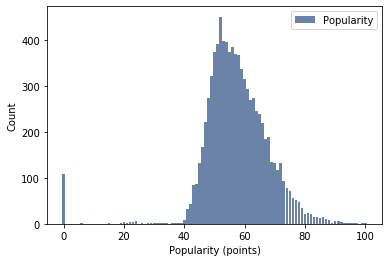

In [19]:
dance = thinkstats2.Hist(db_dance.popularity, label='Popularity')
thinkplot.Hist(dance)
thinkplot.Config(xlabel = 'Popularity (points)', ylabel='Count')

This histogram shows popularity in points by x axis,  and number of songs with this popularity(frequency) of dance songs. 
We can decribe this graph  as normal destribution graph, with top in approximatly 55 by x axis. Also it has tail from right side, and explicit column on 0 by x axis. This dance songs wasn't popular.

Before plotting the 'tempo', I'll apply `floor` to round down:

In [25]:
tempo = np.floor(db_read.tempo)

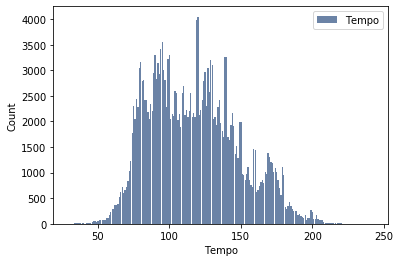

In [24]:
tem = thinkstats2.Hist(tempo, label='Tempo')
thinkplot.Hist(tem)
thinkplot.Config(xlabel = 'Tempo', ylabel='Count')

After floating data I got this graph. It represents tempo of songs. It has random distribution, with peak in 136 tempo, with frequency approximatly 4000 times. Tail from right side.

The histogram of loudness.

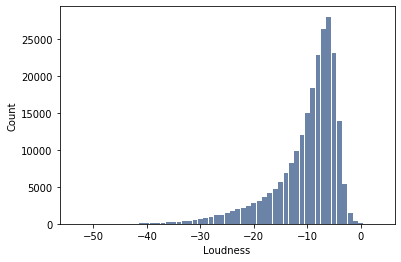

In [32]:
# Solution goes here
ll = np.floor(db_read.loudness)

loud = thinkstats2.Hist(ll)
thinkplot.hist(loud)
thinkplot.Config(xlabel = 'Loudness', ylabel='Count')

This graph of loudness is represented by vertex shifted to the right side and, as a result, a tail on the left side. With top in -6 and popularity over 25000

`Hist` provides smallest, which select the lowest values and their frequencies.

In [36]:
for x, freq in loud.Smallest(10):
    print(x, freq)

-53.0 1
-48.0 5
-47.0 4
-46.0 5
-45.0 14
-44.0 12
-43.0 25
-42.0 39
-41.0 42
-40.0 73


Use `Largest` to display the longest loudness.

In [37]:
# Solution goes here

for x, freq in loud.Largest(10):
    print(x, freq)

3.0 1
1.0 16
0.0 76
-1.0 345
-2.0 1496
-3.0 5372
-4.0 13861
-5.0 23091
-6.0 27981
-7.0 26340


We select songs with popularity 50 and 70

In [46]:
#firsts = live[live.birthord == 1]
#others = live[live.birthord != 1]

#first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
#other_hist = thinkstats2.Hist(others.prglngth, label='other')

pop50_db = db_read[db_read.popularity == 50]
pop70_db = db_read[db_read.popularity == 70]

pop50_hist = thinkstats2.Hist(pop50_db.tempo, label='popularity 50')
pop70_hist = thinkstats2.Hist(pop70_db.tempo, label='popularity 70')

Draw songs' popularity 50 and 70  two histograms side-by-side.

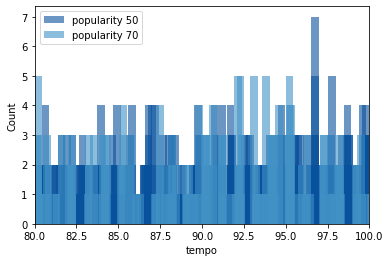

In [55]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(pop50_hist, align='right', width=width)
thinkplot.Hist(pop70_hist, align='left', width=width)
thinkplot.Config(xlabel='tempo', ylabel='Count', xlim=[80, 100])

This graphic depicts the tempo of songs with popularity of 50 and 70. Taken between the tempo and the tempo between 80 and 100. This graph has peak in 96 for 70th popularity, and absolutely random distribution.

`Series` provides methods to compute summary statistics:

In [57]:
mean = db_read.popularity.mean()
var = db_read.popularity.var()
std = db_read.popularity.std()

Here are the mean and standard deviation:

In [58]:
mean, std

(41.12750241701579, 18.189947572630874)

As an exercise, confirm that `std` is the square root of `var`:

In [59]:
np.sqrt(var) == std

True

Here's are the mean tempo for pop50 and pop70:

In [62]:
pop50_db.tempo.mean(), pop70_db.tempo.mean()

(119.44329252077539, 121.34743273231621)

And here's the difference:

In [61]:
pop70_db.tempo.mean()- pop50_db.tempo.mean()

1.9041402115408204

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [65]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in tempo for songs with popularity 50 and 70.

In [66]:
CohenEffectSize(pop70_db.tempo, pop50_db.tempo)

0.06577983297323046

Using the variable `duration_ms`, investigate duration of songs with popularity 50 and 70. 

Compute Cohen’s effect size to quantify the difference between the groups.

In [70]:
pop70_db.duration_ms.mean()/ 60000,  pop50_db.duration_ms.mean()/ 60000

(3.7297866736014798, 3.91577917820868)

In [73]:
CohenEffectSize(pop70_db.duration_ms, pop50_db.duration_ms)/ 60000

-2.7265366655219468e-06

Make a histogram of <tt>popularity</tt> of all songs.

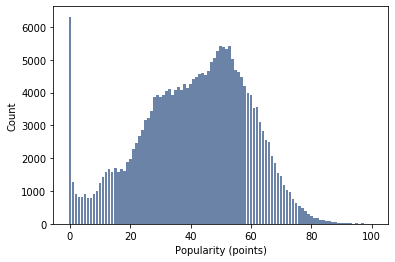

In [78]:
db_popul = thinkstats2.Hist(db_read.popularity)
thinkplot.Hist(db_popul)
thinkplot.Config(xlabel = 'Popularity (points)', ylabel='Count')

The graph shows the distribution of the popularity of all songs in the dataset. There is a clear preponderance towards songs that, when downloaded, do not succeed among listeners. The top of the popular songs is shifted to the center and has a more gentle slope on the right side.

Make a histogram of <tt>mode</tt>.

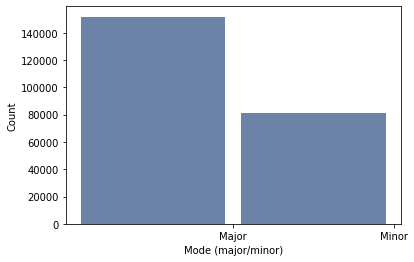

In [94]:
mode_counter = Counter(db_read['mode'])
db_mode = thinkstats2.Hist(mode_counter)
thinkplot.Hist(db_mode)
thinkplot.Config(xlabel = 'Mode (major/minor)', ylabel='Count')

Here you can see the superiority of major over minor.

Make a histogram of <tt>valence</tt>

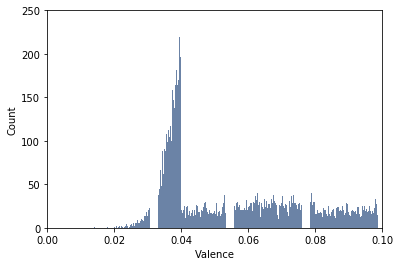

In [107]:
valence_counter = Counter(db_read['valence'])
db_valence = thinkstats2.Hist(valence_counter)
thinkplot.Hist(db_valence)
thinkplot.Config(xlabel = 'Valence', ylabel='Count', ylim=[0, 250], xlim = [0.0, 0.1])

On the valency graph, you can see 4 separately lying areas. At the first skyscraper shaped peak with tail from left side and direct fall from right.

Make a histogram of <tt>Dance music popularity</tt>

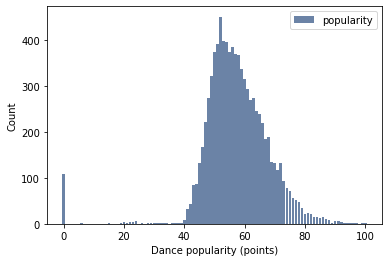

In [131]:
db_popul = thinkstats2.Hist(db_dance.popularity)
thinkplot.Hist(db_popul, label='popularity')
thinkplot.Config(xlabel = 'Dance popularity (points)', ylabel='Count')

If you compare the popularity of all music and only music in the genre of dancing, you can see the shift of the graphic closer to the center and the smaller number of "not popular songs"

Use Hist.Largest to find the largest values of popularity from privious histogram.

In [133]:
# Solution goes here

db_popul.Largest(10)

[(100, 1),
 (99, 1),
 (97, 2),
 (96, 1),
 (95, 2),
 (94, 1),
 (93, 1),
 (92, 4),
 (91, 6),
 (90, 6)]

Use <tt>Key</tt> to select the songs with the highest popularity.  Plot the histogram of <tt>popularity</tt> for just the "C" key songs.

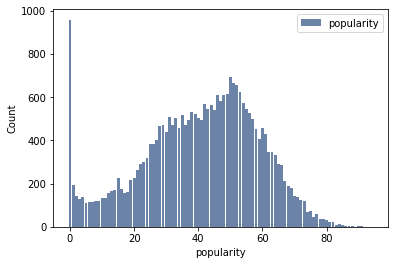

In [143]:
key_db = db_read[db_read.key == 'C']
hist_C_popul = thinkstats2.Hist(key_db.popularity)
thinkplot.Hist(hist_C_popul, label='popularity')
thinkplot.Config(xlabel='popularity', ylabel='Count')

This graph is very similar to the distribution of popularity of all songs in the dataset. It has a characteristic preponderance of the number of “not popular songs”, but a normal distribution shape.

Find the largest popularity for "C" key.


In [147]:
hist_C_popul.Largest(20)

[(94, 1),
 (91, 3),
 (90, 5),
 (89, 1),
 (88, 6),
 (87, 6),
 (86, 2),
 (85, 9),
 (84, 14),
 (83, 8),
 (82, 24),
 (81, 22),
 (80, 30),
 (79, 36),
 (78, 36),
 (77, 58),
 (76, 46),
 (75, 72),
 (74, 70),
 (73, 118)]

Compare the mean <tt>popularity</tt> for songs with key "C" and others.

In [152]:
key_not_C = db_read[db_read.key != 'C']

key_db.popularity.mean(), key_not_C.popularity.mean()

(40.387920095711124, 41.226945237932746)

Compute the Cohen effect size for this difference.  How does it compare with the difference in popularity for songs with key "C" and others?

In [154]:
# Solution goes here
CohenEffectSize(key_db.popularity, key_not_C.popularity)

-0.046130785370963705